In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#import klib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff # it is the module which includes many wrapper functions which are not included in plotly.js 
%pylab inline
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

Populating the interactive namespace from numpy and matplotlib


In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
#set option 
pd.set_option('display.max_rows', 100)   # max row --> will show 100 row , none --< all 
pd.set_option('display.max_columns', None) # max colum
pd.options.display.float_format = '{:.5f}'.format  # to get rid off e to the power value
# to reset all 
#pd.reset_option('all')

In [4]:
df = pd.read_csv('AirBnB_US_2021.csv')

In [5]:
df.shape
# original shape of the DataFrame 

(201709, 76)

In [6]:
df = df.drop('Unnamed: 0', axis = 1)
# drop the column 'Unnamed: 0'

In [7]:
df.shape 

(201709, 75)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201709 entries, 0 to 201708
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            201709 non-null  int64  
 1   listing_url                                   201709 non-null  object 
 2   scrape_id                                     201709 non-null  int64  
 3   last_scraped                                  201709 non-null  object 
 4   name                                          201691 non-null  object 
 5   description                                   197088 non-null  object 
 6   neighborhood_overview                         130478 non-null  object 
 7   picture_url                                   201708 non-null  object 
 8   host_id                                       201709 non-null  int64  
 9   host_url                                      20

In [9]:
# there are many null values in the some of the columns 
# whereas, some of the columns have no null values 
# Bathrooms, calendar_updated , have 100% null values

In [10]:
df_new = df.copy()
# making a new DataFrame keeping the original dataset impact 

# Null Value Treatment 

In [11]:
df_null = pd.DataFrame() # create an empty DataFrame 
df_null['count'] = df_new.isnull().sum(axis = 0)
df_null['% age of null value'] = df_new.isnull().sum(axis = 0)/df_new.shape[0]*100
df_null.sort_values(by = 'count' , ascending = False)

# step 1: see the null values in the dataframe, column-wise , and remove more than 30% null values. 

,count,% age of null value
calendar_updated,201709,100.00000
bathrooms,201709,100.00000
license,150153,74.44041
neighbourhood_group_cleansed,103140,51.13307
host_about,73971,36.67214
neighborhood_overview,71231,35.31374
neighbourhood,71227,35.31176
review_scores_value,45173,22.39513
review_scores_location,45168,22.39265
review_scores_checkin,45161,22.38918


In [12]:
drop_cols = list(df_null[df_null['% age of null value'] > 30].index)
# drop all the columns that have more than 30% of the null values. 

In [13]:
drop_cols

['neighborhood_overview',
 'host_about',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'license']

In [14]:
len(drop_cols)
# 7 columns have more than 30% null values 

7

In [15]:
df_new = df_new.drop(drop_cols, axis = 1)

In [16]:
df_new.shape 

(201709, 68)

## DROP ROWS 

In [17]:
# df_null_rows is the dataFrame containing the null values in each row

In [18]:
df_null_rows = pd.DataFrame()
df_null_rows['count'] = df_new.isnull().sum(axis =1)
df_null_rows['% age of null value'] = df_new.isnull().sum(axis =1)/df_new.shape[1] * 100
df_null_rows.sort_values(by = 'count' , ascending = False)

,count,% age of null value
200357,25,36.76471
94694,25,36.76471
200313,25,36.76471
200312,25,36.76471
200309,25,36.76471
...,...,...
137253,0,0.00000
10086,0,0.00000
137251,0,0.00000
65752,0,0.00000


In [19]:
drop_rows = list(df_null_rows[df_null_rows['% age of null value'] > 30].index)

In [20]:
# drop rows that have 30% null values. 

In [21]:
len(drop_rows)
# 271 rows have more than 30% null values.

271

In [22]:
# drop the rows 
df_new = df_new.drop(drop_rows, axis = 0)

In [23]:
df_new.shape 

(201438, 68)

In [24]:
df_useful_col = pd.read_excel('df_useful_col.xlsx'  , header =None ,names = ['useful_col'])
df_useful_col = df_useful_col.useful_col.to_list()
df_useful_col

['host_id',
 'host_since',
 'host_location',
 'host_response_time',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'reviews_per_month',
 'City',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'last_scraped',
 'calculated_host_listings_count_entire_homes']

In [25]:
len(df_useful_col)
# 41 useful columns, we deleted the columns, that could be irrelevant for model building.

41

In [26]:
df_fin = df_new.loc[:,df_useful_col]

In [27]:
df_fin.shape

(201438, 41)

In [28]:
df_new = df_fin.copy(deep = True)

In [29]:
df_new.shape

(201438, 41)

In [30]:
# making price column numerical
df_new['price']=df_new['price'].str.replace('$','')
df_new['price']=df_new['price'].str.replace(',','')

In [31]:
df_new['price']=df_new['price'].astype('float')

In [32]:
def isnull_count(df):
    return df.isnull().sum()/len(df)*100

In [33]:
isnull_count(df_new)[isnull_count(df_new)>0]

host_since                     0.02532
host_location                  0.21396
host_response_time            22.06436
host_acceptance_rate          20.94441
host_is_superhost              0.02532
host_listings_count            0.02532
host_total_listings_count      0.02532
host_identity_verified         0.02532
bathrooms_text                 0.14396
bedrooms                      10.17286
beds                           1.80055
review_scores_rating          21.44829
review_scores_accuracy        22.26889
review_scores_cleanliness     22.26094
review_scores_checkin         22.28477
review_scores_communication   22.26789
review_scores_location        22.28825
review_scores_value           22.29073
reviews_per_month             21.44829
dtype: float64

In [34]:
to_be_imputed = list(isnull_count(df_new)[isnull_count(df_new)>0].index)

In [35]:
to_be_imputed
# 19 columns are to be imputed in the dataset

['host_since',
 'host_location',
 'host_response_time',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_identity_verified',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

## Imputing the Numerical Columns 

In [36]:
df_new['host_since'] = df_new['host_since'].fillna('2016-12-16')
# imputed it with the first date 

In [37]:
df_new['host_location'] = df_new['host_location'].fillna('New York, New York, United States')
# replaced with the location that appeared maximum number of times 

In [38]:
df_new['host_is_superhost'] = df_new['host_is_superhost'].fillna('f')
# it is also replaced with the mode of host is superhost

In [39]:
df_new['host_identity_verified'] = df_new['host_identity_verified'].fillna('t')
# it is also replaced with the mode

In [40]:
df_new['bathrooms_text'] = df_new['bathrooms_text'].fillna('1 bath')
# it is also replaced with mode

In [41]:
df_new['bedrooms'] = df_new['bedrooms'].fillna(1)
# bedrooms are also replaced with the mode

In [42]:
df_new['beds'] = df_new['beds'].fillna(2)
# beds are also replaced with the mode

In [43]:
df_new['host_total_listings_count']= df_new['host_total_listings_count'].fillna(df_new['host_total_listings_count'].median())
# host_total_listings count is replaced with the median

In [44]:
response_count = pd.crosstab(index= df_new['host_id'],columns = df_new['host_response_time'])
# replacing the null values in the host_response count 

In [45]:
response_count
# host response time --> few days or more, within a day, within a few hours, within an hour

host_response_time,a few days or more,within a day,within a few hours,within an hour
host_id,,,,
23,0,3,0,0
615,0,0,0,2
666,0,0,0,2
908,0,0,15,0
933,0,0,2,0
...,...,...,...,...
415509559,0,0,3,0
415516728,0,0,1,0
415664843,0,0,1,0


In [46]:
response_count.idxmax(axis = 1)
# The idxmax() function is used to get the row label of the maximum value. If multiple values equal the maximum, the first row label with that value is returned. Exclude NA/null values. If the entire Series is NA, the result will be NA

host_id
23                 within a day
615              within an hour
666              within an hour
908          within a few hours
933          within a few hours
                    ...        
415509559    within a few hours
415516728    within a few hours
415664843    within a few hours
415730082        within an hour
415761992        within an hour
Length: 71500, dtype: object

In [47]:
response_count.index

Int64Index([       23,       615,       666,       908,       933,       990,
                 1033,      1169,      1221,      1618,
            ...
            415301544, 415302168, 415320191, 415362392, 415365919, 415509559,
            415516728, 415664843, 415730082, 415761992],
           dtype='int64', name='host_id', length=71500)

In [48]:
null_response_host_id = df_new.loc[df_new['host_response_time'].isnull(),'host_id']
len(null_response_host_id.values)
# 44446 null values are present in the host response time , 44446 indicates the host ids of those null response time 

44446

In [49]:
df_new['host_listings_count'].fillna(df_new['host_listings_count'].mode()[0], inplace = True)

In [50]:
#imputing response time according to hostid, if host_id has multiple listing and one listing has
#some response time but other listing does not have then imputing in it that response time too
# if hostid having single listing then we are imputing it with mode of the response time

for i in null_response_host_id.values:
    if i in response_count.index:
        df_new.loc[df_new['host_id']==i,'host_response_time']=response_count.idxmax(axis = 1)[i]
    else:
        df_new.loc[df_new['host_id']==i,'host_response_time'] = df_new['host_response_time'].mode()[0]

In [51]:
# imputing response time with mode of the acceptance rate
df_new.loc[df_new['host_acceptance_rate'].isnull(),'host_acceptance_rate'] = df_new['host_acceptance_rate'].mode()[0]

1.) host_since is imputed with the minimum host_since dat


2.) all the review columns are imputed with the corresponding mean of the scores of, also average for scores are different for different cities so cities are taken into consideration to fill the nan values

3.) host_response_time is imputed considering host_id, if host_id has multiple listings and one of the listing has response time but other listing doesnt have that then we impute it with the response time of the available listing else we impute it with the mode of listing


4.) All other numerical and categorical columns having null values are imputed with either mode or median or mean

In [52]:
# From the unique values of neighbourhood_cleansed we can see that there is presence of strings as well as numerical values
# which makes difficult to retrive certain specific strings from the records.

df_new['neighbourhood_cleansed'].unique()

array([28801, 28806, 28804, ...,
       'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Fort Dupont',
       'Near Southeast, Navy Yard',
       'Woodland/Fort Stanton, Garfield Heights, Knox Hill'], dtype=object)

In [53]:
df_new['review_scores_accuracy'].fillna(df_new['review_scores_accuracy'].mean(), inplace = True )
df_new['review_scores_value'].fillna(df_new['review_scores_value'].mean(), inplace = True )
df_new['review_scores_location'].fillna(df_new['review_scores_location'].mean(),inplace = True)
df_new['review_scores_checkin'].fillna(df_new['review_scores_checkin'].mean(),inplace = True)
df_new['reviews_per_month'].fillna(df_new['reviews_per_month'].mean(),inplace = True)
df_new['review_scores_cleanliness'].fillna(df_new['review_scores_cleanliness'].mean(), inplace = True)
df_new['review_scores_communication'].fillna(df_new['review_scores_communication'].mean(),inplace = True)
df_new['review_scores_rating'].fillna(df_new['review_scores_rating'].mean(),inplace = True)

In [54]:
# Dividing neighbourhood_cleansed' into 2 different columns - digit and text

df_new['neighbourhood_digit'] = pd.to_numeric(df_new['neighbourhood_cleansed'], errors = 'coerce')


In [55]:
df_new['neighbourhood_digit']
# it only has the numeric digits 
# errors = 'coerce', It will ignore all non-numeric values. Output: Code #3: Using errors='coerce'. It will replace all non-numeric values with NaN.

0        28801.00000
1        28806.00000
2        28806.00000
3        28806.00000
4        28801.00000
             ...    
201704           NaN
201705           NaN
201706           NaN
201707           NaN
201708           NaN
Name: neighbourhood_digit, Length: 201438, dtype: float64

In [56]:
mask = df_new['neighbourhood_digit'].isna()
# mask contains True, for all those null values, which contained 
# the non-numeric content. 

In [57]:
# so df['neighbour_digit'] is of no use 

In [58]:
df_new.loc[mask,'neighbour_text'] = df_new.loc[mask, 'neighbourhood_cleansed']
# wherever mask value was False, make a new column neighbourhood text, which will contain all the neighbourhood locations 

In [59]:
df_new['neighbour_text'].unique()

array([nan, 'East Boston', 'Roxbury', ...,
       'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Fort Dupont',
       'Near Southeast, Navy Yard',
       'Woodland/Fort Stanton, Garfield Heights, Knox Hill'], dtype=object)

In [60]:
# we have filled all the NaN values wherever there were digits were present in the neighbourhood cleansed.

In [61]:
# Filling NaN values with '###'
# This step is required since we will create a function next and it wont work if there are presence of null values.
df_new['neighbour_text'] = df_new['neighbour_text'].fillna('###')

## FEATURE ENGINEERING 

In [62]:
# create a function to count properties which have 'Park'
def near_park(x):
    if 'Park' in x:
        return 't'
    else:
        return 'f' 

In [63]:
df_new['park_view'] = df_new['neighbour_text'].apply(near_park)
# apply the 'near_park' function on neighbourhood text

In [64]:
df_new['park_view'].value_counts()

f    191396
t     10042
Name: park_view, dtype: int64

In [65]:
# creating a function which properties have water bodies in their neighbourhood

def near_water(x):
    mylist = ['Beach','Lake','Lakes','Sea','Bay','Waterfront','Creek','Riverside','Shore','Meadows']
    for i in mylist:
        if i in x:
            return 't'
    else:
        return 'f'

In [66]:
df_new['water_view'] = df_new['neighbour_text'].apply(near_water)
# apply the function the neighbourhood text

In [67]:
df_new['water_view'].value_counts()
# most of the properties doesn't have water bodies, in their neighbourhood

f    186992
t     14446
Name: water_view, dtype: int64

In [68]:
# Creating a function to count records which contains mountains related locations.

def near_hill(x):
    mylist = ['Hill','Hills','Valley','Canyons']
    for i in mylist:
        if i in x:
            return 't'
    else:
        return 'f'

In [69]:
df_new['hill_view'] = df_new['neighbour_text'].apply(near_hill)

In [70]:
df_new['hill_view'].value_counts()

f    192705
t      8733
Name: hill_view, dtype: int64

In [71]:
# Changing data type of 3 new featues.

df_new['park_view'] = df_new['park_view'].astype('object')
df_new['water_view'] = df_new['water_view'].astype('object')
df_new['hill_view'] = df_new['hill_view'].astype('object')

In [72]:
# Dropping'neighbourhood_cleansed','neighbour_digit','neighbour_text' features.

df_new.drop(['neighbourhood_cleansed','neighbour_text', ],axis=1,inplace=True)

In [73]:
df_new.drop('neighbourhood_digit', axis = 1, inplace = True)

In [74]:
from datetime import datetime 
from dateutil import relativedelta 
import datetime 

#### Calculate the Host Experience 

In [75]:
diff = pd.to_datetime(df_new['last_scraped']) - pd.to_datetime(df_new['host_since'])

In [76]:
#diff = (end.year - start.year) * 12 + (end.month  - start.month )

# Aadding a column in main data frame. 
df_new['diff_in_month'] =  (((pd.to_datetime(df['last_scraped']).dt.year) - (pd.to_datetime(df_new['host_since']).dt.year))* 12) + (pd.to_datetime(df['last_scraped']).dt.month - pd.to_datetime(df_new['host_since']).dt.month)

In [77]:
# adding another coloum as 'host_age' based on diff_in_month as below condition
# two categories has been made --> old and new 
#if diff_in_month > 6 month  -->  value os 'old' 
# else value is 'new' 


df_new['host_exp'] = ['new' if  i < 7 else 'old' for i in df_new['diff_in_month']]

#host_age = ['new' if  i > 7 else 'old' for i in inmonth['diff']]

### Correlation with the Target Variable 

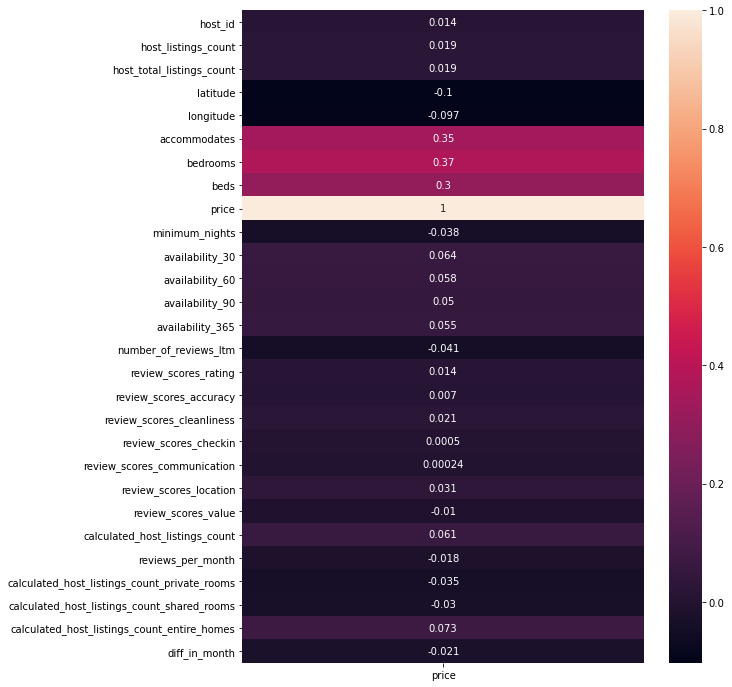

In [78]:
plt.figure(figsize = (9,12))
sns.heatmap(df_new.corr()[['price']], annot = True)
plt.show()

### import the city data 

In [79]:
df_city = pd.read_excel('City_Data_updated.xlsx')
df_city.shape

(28, 7)

In [80]:
df_city.rename(columns = {'city': 'City'}, inplace = True)

* in the dataFrame, we have added some extra features, such as population, landscape, weather of that city, and have 
assigned different tiers to the cities, on the basis of population, highly populated cities being the Tier 1 cities.

In [81]:
df_city.head(5)

,City,state,population,Geography,landscape,Weather,city_tier
0,New_York,New York,18713220,"farms, forests, rivers, mountains, and lakes.",Plain,High temperatures and evenly distributed prec...,Tier1
1,Los_Angeles,California,12750807,a coastal plain separated by low mountains,Coastal Plain,Hot Summer and cold Winter,Tier1
2,Hawaii,Hawaii,1826327,a group of volcanic islands,islands,Hot Summer and cold Winter,Tier1
3,Broward_County,Florida,1944375,Green plain land with Sea coast,Coastal Plain,Hot Summer and cold Winter,Tier1
4,Austin,Texas,1687311,"Colorado River,hill Country ,limestone cliff",Hilly,Hot Summer and Mild Winter,Tier1


In [82]:
df_final = df_new.merge(df_city, on = 'City')
# create a final dataFrame

In [83]:
df_final.shape
# shape of the dataFrame, after including extra features. 

(201438, 51)

In [84]:
df_final.head(3)

,host_id,host_since,host_location,host_response_time,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,City,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,last_scraped,calculated_host_listings_count_entire_homes,park_view,water_view,hill_view,diff_in_month,host_exp,state,population,Geography,landscape,Weather,city_tier
0,320564,2010-12-16,"Asheville, North Carolina, United States",within a day,25%,f,2.00000,2.00000,t,35.60670,-82.55563,Entire home/apt,2,1 bath,1.00000,1.00000,"[""Microwave"", ""Free parking on premises"", ""Ded...",82.00000,30,t,0,1,1,217,0,4.49000,4.57000,4.70000,4.85000,4.79000,4.84000,4.48000,f,2,0.75000,Ashville,0,0,2021-07-10,2,f,f,f,127.00000,old,North Carolina,312507,Mountains with Land,Plain and Hilly area,wetter Summer and Cold Winter,Tier3
1,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99%,t,7.00000,7.00000,t,35.57864,-82.59578,Entire home/apt,2,1 bath,1.00000,1.00000,"[""Stove"", ""Microwave"", ""Free parking on premis...",91.00000,1,t,13,33,48,130,70,4.57000,4.68000,4.38000,4.81000,4.76000,4.92000,4.51000,t,7,5.39000,Ashville,2,4,2021-07-10,1,f,f,f,121.00000,old,North Carolina,312507,Mountains with Land,Plain and Hilly area,wetter Summer and Cold Winter,Tier3
2,746673,2011-06-26,"Asheville, North Carolina, United States",within an hour,99%,t,7.00000,7.00000,t,35.57864,-82.59578,Private room,2,2.5 shared baths,1.00000,1.00000,"[""Dishes and silverware"", ""Hot water"", ""Smoke ...",66.00000,1,t,0,0,0,4,0,4.52000,4.73000,4.43000,4.76000,4.61000,4.84000,4.46000,t,7,3.09000,Ashville,2,4,2021-07-10,1,f,f,f,121.00000,old,North Carolina,312507,Mountains with Land,Plain and Hilly area,wetter Summer and Cold Winter,Tier3


### Data Type conversion 

In [85]:
# converting host_acceptance_rate into float                                                                         

df_final['host_acceptance_rate'].replace({'%': ''} , inplace =True ,regex = True)
df_final['host_acceptance_rate'] = df_final['host_acceptance_rate'].astype(int64)
df_final['host_acceptance_rate'] = df_final['host_acceptance_rate']/100

### EDA 

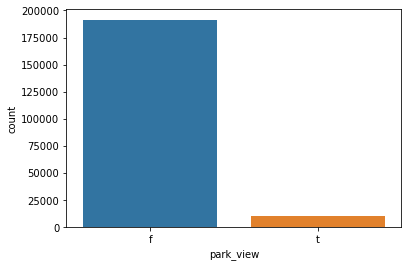

In [86]:
sns.countplot(x = df_final['park_view'])
plt.show()

* From this plot, it can be inferred that very few properties have a **park view** near them.

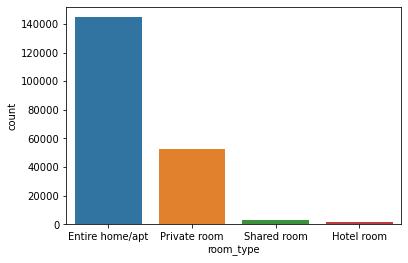

In [87]:
sns.countplot(df_final['room_type'])
plt.show()

* From this it can be inferred, that most of properties are either **Entire Home/apt** or **Private room**

In [88]:
def cnt_amenties(x):
    cnt = 0
    x = x.strip('][').split(', ')
    return len(x)

In [89]:
df_final['amenties_count'] = df_final['amenities'].apply(cnt_amenties)

### Drop the columns, that are not needed after doing Feature Enginneering

In [90]:
df_final.drop(['host_id' , 'host_since' , 'host_location' , 'bathrooms_text' , 'amenities' , 'last_scraped','state' ,'host_exp' , 'Geography' , 'landscape' , 'Weather' , 'City'], axis = 1, inplace = True)

In [91]:
df_final.shape

(201438, 40)

In [92]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
ss = StandardScaler()

In [93]:
target = df_final['price']

In [94]:
num_cols = df_final.select_dtypes(include = np.number).drop('price', axis = 1)
num_cols_scaled = pd.DataFrame(ss.fit_transform(num_cols), columns = num_cols.columns)

In [95]:
cat_cols = df_final.select_dtypes(exclude = np.number)

In [96]:
cat_cols_encoded = pd.get_dummies(cat_cols, drop_first = True)

In [97]:
df_scaled = pd.concat([num_cols, cat_cols_encoded], axis = 1)

### Distribution of Target Variable **Price**

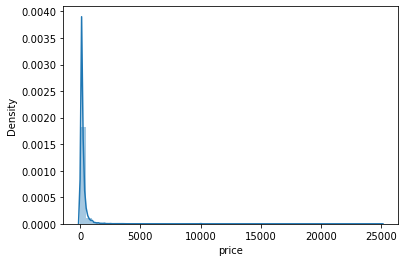

In [98]:
sns.distplot(target)
plt.show()

* it’s clear that the distribution of price is not normally distributed throughout. Since the goal of this is to determine factors 
that affect Airbnb price, a square root transformation was done on price to improve the linearity between the dependent
variables. This transformation would minimize the effects of these extreme values, and provide
a more accurate model that represents the majority of the dataset.

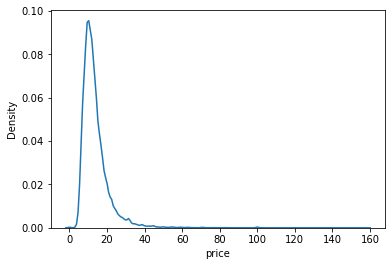

In [99]:
sns.kdeplot(np.sqrt(df_final['price']))
plt.show()

### Train, Test Split 

In [100]:
from sklearn.model_selection import train_test_split
X = df_scaled
y = np.sqrt(target)

In [101]:
x_train,x_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Base model 

In [102]:
import statsmodels.api  as sm 

In [132]:
X = x_train
x = sm.add_constant(X)
y = y_train
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2873.
Date:                Fri, 05 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:26:32   Log-Likelihood:            -5.0896e+05
No. Observations:              161150   AIC:                         1.018e+06
Df Residuals:                  161106   BIC:                         1.018e+06
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            1.2266      0.329      3.727      0.000       0.582       1.872
host_acceptance_rate                            -0.9971      0.072    -13.846      0.000      -1.138      -0.856
latitude                                        -0.0477      0.003    -15.569      0.000      -0.054      -0.042
longitude                                       -0.0263      0.001    -35.525      0.000      -0.028      -0.025
accommodates                                     0.7574      0.011     68.537      0.000       0.736       0.779
bedrooms                                         2.4211      0.026     93.444      0.000       2.370       2.472
beds                                            -0.1371      0.014     -9.967      0.000      -0.164      -0.110
minimum_nights                                  -0.0130      0.001    -23.295      0.000      -0.014      -0.012
availability_30                                  0.0913      0.004     23.590      0.000       0.084       0.099
availability_60                                  0.0028      0.004      0.709      0.478      -0.005       0.010
availability_90                                 -0.0052      0.002     -2.639      0.008      -0.009      -0.001
availability_365                                -0.0004      0.000     -2.991      0.003      -0.001      -0.000
number_of_reviews_ltm                           -0.0271      0.001    -26.330      0.000      -0.029      -0.025
review_scores_rating                             0.2198      0.032      6.808      0.000       0.157       0.283
review_scores_accuracy                           0.3878      0.074      5.273      0.000       0.244       0.532
review_scores_cleanliness                        1.0980      0.055     20.074      0.000       0.991       1.205
review_scores_checkin                           -0.8645      0.069    -12.468      0.000      -1.000      -0.729
review_scores_communication                      0.0203      0.072      0.284      0.776      -0.120       0.161
review_scores_location                           2.0674      0.060     34.368      0.000       1.949       2.185
review_scores_value                             -1.6295      0.066    -24.704      0.000      -1.759      -1.500
calculated_host_listings_count                   0.0198      0.002     10.920      0.000       0.016       0.023
reviews_per_month                                0.0028      0.003      0.811      0.417      -0.004       0.010
calculated_host_listings_count_private_rooms    -0.0258      0.002    -12.320      0.000      -0.030      -0.022
calculated_host_listings_count_shared_rooms     -0.1054      0.007    -14.434      0.000      -0.120      -0.091
calculated_host_listings_count_e

** Observations ** 

* Very high multi-collinearity in the data.


### VIF 

In [105]:
vif_data = df_scaled

num_cols = vif_data.select_dtypes(include=np.number) # Predictor Variables..

mylist = [] # Store all the vif values

for i in range(num_cols.shape[1]):
    mylist.append(variance_inflation_factor(num_cols.values, i))

In [106]:
pd.DataFrame({"Labels:": num_cols.columns, "VIF": mylist}).sort_values(by = 'VIF', ascending = False) 

,Labels:,VIF
2,host_total_listings_count,322101382.51069
1,host_listings_count,322101186.69655
15,review_scores_accuracy,616.85389
18,review_scores_communication,593.92744
17,review_scores_checkin,546.60996
20,review_scores_value,483.12404
19,review_scores_location,374.64475
16,review_scores_cleanliness,331.42366
14,review_scores_rating,115.73292
10,availability_60,72.18262


In [107]:
## drop some columns that have high vif values 
df_scaled.drop(['host_total_listings_count','host_listings_count'], axis = 1, inplace = True)

In [108]:
from sklearn.model_selection import train_test_split
X = df_scaled
y = np.sqrt(target)
x_train,x_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [109]:
lr = LinearRegression()
model_bs = lr.fit(x_train, y_train)
y_pred_bs = model_bs.predict(x_test)
print('Test R2 Score:', r2_score(y_test, y_pred_bs))
print(' Test Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred_bs)))

R2 Score: 0.44641320311061694
Root Mean Square Error: 5.555632738531892


In [110]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print('Test R2 Score:', r2_score(y_test, y_pred_rf))
print('Test Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

R2 Score: 0.6422558056511244
Root Mean Square Error: 4.466084789214054


In [147]:
xg = XGBRegressor()
model_xg = xg.fit(x_train, y_train)
y_pred_xg = model_xg.predict(x_test)
print('Test R2 Score:',np.round(r2_score(y_test, y_pred_xg)*100),2)
print('Test Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred_xg)))

Test R2 Score: 65.0 2
Test Root Mean Square Error: 4.422132105332224


### Feature Importance 

In [119]:
importances = pd.DataFrame(model_xg.feature_importances_, index = x_train.columns, columns = ['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)

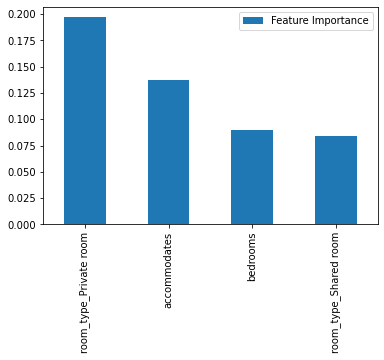

In [129]:
importances[importances['Feature Importance'] >= 0.050].plot(kind = 'bar')
plt.show()

* Four most important features according to XGBoostModel are **room_type_private room**, **accomodates**, **bedrooms**, **room_type_shared room** 

### Inference 

* The least Root Mean Square is achieved with XGBoostRegressor.



* This model can be used by hosts, to find the appropriate pricing of their properties, according to the different landscapes, weather, and other factors.



* This model can help the hosts to strategically price their stay.


### Limitations of this Model 

* Some possible improvements to this research could be processing the data from every month of the year or broadening the scope of the study to other cities.



* New listings are often added so with this time series data, each listing can be followed and monthly progress could be calculated.
